In [41]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import sklearn.externals
import joblib 
import IPython.display 
import sklearn.tree 
import pydotplus
import os
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier


### dataset Details
The dataset used for this research is the CIRA-CIC-DoHBrw-2020 df developed by the Canadian Institute of Cybersecurity.
This df can be found on : ```https://www.unb.ca/cic/dfs/dohbrw-2020.html```

The CIRA-CIC-DoHBrw-2020 df provides 10 days of network traffic from Monday, December 10 to Thursday December 20, 2019. The df consists of 371,836 labelled network flows consisting of 34 features (MontazeriShatoori, et al., 2020).


In [5]:
# importing the df and outputting the first 5 samples in the df
df = pd.read_csv("/Users/sanjanakannakatti/Projects/data.csv")
print(df.shape)
df.head(10)

(1167136, 36)


Unnamed: 0        SourceIP    DestinationIP  SourcePort  DestinationPort  \
0           0     72.21.91.42   192.168.20.191         443            51041   
1           1  192.168.20.191   195.201.169.48       51043              443   
2           2  192.168.20.191     96.17.115.57       51021              443   
3           3  192.168.20.191    96.114.14.140       50308              443   
4           4  192.168.20.191    23.78.199.198       50983              443   
5           5  192.168.20.191     66.218.84.45       49762              443   
6           6  192.168.20.191  151.101.124.237       50649              443   
7           7  192.168.20.191  151.101.124.237       50650              443   
8           8  192.168.20.191   104.244.42.195       49745              443   
9           9  192.168.20.191   151.101.124.84       49872              443   

             TimeStamp  Duration  FlowBytesSent  FlowSentRate  \
0  2020-01-14 15:49:01  4.544040       11256331  2.477164e+06   
1  2020-01-14 15:49:03  8.171041            930  1.138166e+02   
2  2020-01-14 15:49:03  0.033776            162  4.796305e+03   
3  2020-01-14 15:49:03  0.060723            108  1.778568e+03   
4  2020-01-14 15:49:03  0.019545             55  2.814019e+03   
5  2020-01-14 15:49:04  0.029580             55  1.859364e+03   
6  2020-01-14 15:49:05  0.025021             55  2.198154e+03   
7  2020-01-14 15:49:05  0.025077             55  2.193245e+03   
8  2020-01-14 15:49:05  0.044585             55  1.233599e+03   
9  2020-01-14 15:49:05  0.025090             55  2.192108e+03   

   FlowBytesReceived  ...  PacketTimeCoefficientofVariation  \
0             159324  ...                          0.580949   
1              11936  ...                          1.745138   
2                138  ...                          0.500002   
3                120  ...                          0.577350   
4                 66  ...                          1.000000   
5                 60  ...                          1.000000   
6                 66  ...                          1.000000   
7                 66  ...                          1.000000   
8                 66  ...                          1.000000   
9                 66  ...                          1.000000   

   ResponseTimeTimeVariance  ResponseTimeTimeStandardDeviation  \
0              1.107852e-07                           0.000333   
1              3.224052e+00                           1.795565   
2              0.000000e+00                           0.000000   
3              0.000000e+00                           0.000000   
4              0.000000e+00                           0.000000   
5              0.000000e+00                           0.000000   
6              0.000000e+00                           0.000000   
7              0.000000e+00                           0.000000   
8              0.000000e+00                           0.000000   
9              0.000000e+00                           0.000000   

   ResponseTimeTimeMean  ResponseTimeTimeMedian  ResponseTimeTimeMode  \
0              0.000027                0.000016              0.000014   
1              0.886579                0.103698              0.000900   
2              0.033683                0.033683              0.033683   
3              0.060687                0.060687              0.060687   
4              0.019545                0.019545              0.019545   
5              0.029580                0.029580              0.029580   
6              0.025021                0.025021              0.025021   
7              0.025077                0.025077              0.025077   
8              0.044585                0.044585              0.044585   
9              0.025090                0.025090              0.025090   

   ResponseTimeTimeSkewFromMedian  ResponseTimeTimeSkewFromMode  \
0                        0.096659                      0.038228   
1                        1.308024                      0.4

In [6]:
print(df.describe)

<bound method NDFrame.describe of          Unnamed: 0        SourceIP   DestinationIP  SourcePort  \
0                 0     72.21.91.42  192.168.20.191         443   
1                 1  192.168.20.191  195.201.169.48       51043   
2                 2  192.168.20.191    96.17.115.57       51021   
3                 3  192.168.20.191   96.114.14.140       50308   
4                 4  192.168.20.191   23.78.199.198       50983   
...             ...             ...             ...         ...   
1167131      249831         1.1.1.1  192.168.20.207         443   
1167132      249832         1.1.1.1  192.168.20.207         443   
1167133      249833         1.1.1.1  192.168.20.207         443   
1167134      249834         1.1.1.1  192.168.20.207         443   
1167135      249835         1.1.1.1  192.168.20.207         443   

         DestinationPort            TimeStamp    Duration  FlowBytesSent  \
0                  51041  2020-01-14 15:49:01    4.544040       11256331   
1        

In [7]:
# Analyzing the target class to see how balanced or unbalanced the dataset is.
print(df.groupby('Label').size())

Label
Benign        19807
Malicious    249836
NonDoH       897493
dtype: int64


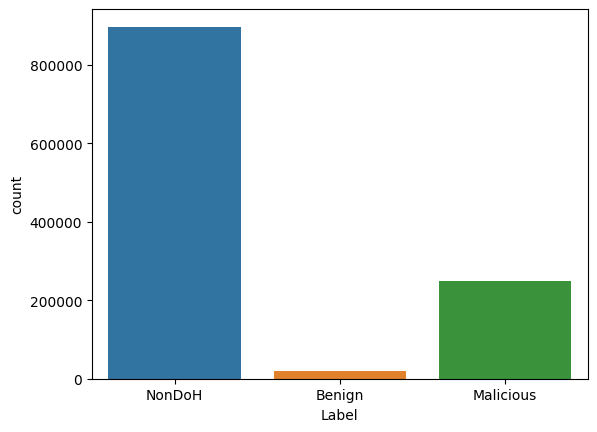

In [8]:
sns.countplot(x='Label', data=df);

<AxesSubplot: xlabel='FlowSentRate', ylabel='FlowReceivedRate'>

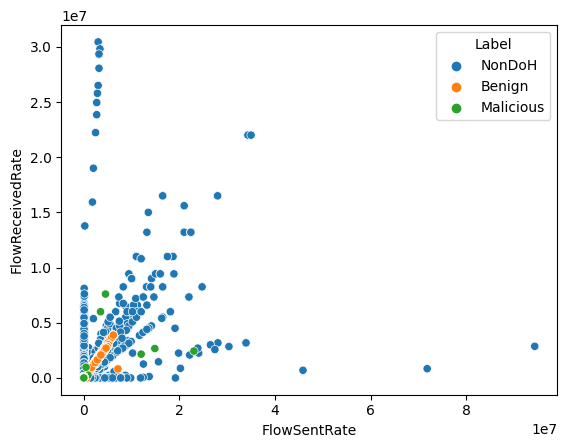

In [53]:
sns.scatterplot(data=df, x='FlowSentRate', y='FlowReceivedRate', hue='Label')

In [9]:
#checking for the null values and removong.
null = df.isnull()
print(df.isnull().any().any())
print(null.sum())
df['ResponseTimeTimeMedian'] = df['ResponseTimeTimeMedian'].fillna(0)
df['ResponseTimeTimeSkewFromMedian'] = df['ResponseTimeTimeSkewFromMedian'].fillna(0)
null = df.isnull()
print("New: ", df.isnull().any().any())
print("New: ", null.sum())

True
Unnamed: 0                                   0
SourceIP                                     0
DestinationIP                                0
SourcePort                                   0
DestinationPort                              0
TimeStamp                                    0
Duration                                     0
FlowBytesSent                                0
FlowSentRate                                 0
FlowBytesReceived                            0
FlowReceivedRate                             0
PacketLengthVariance                         0
PacketLengthStandardDeviation                0
PacketLengthMean                             0
PacketLengthMedian                           0
PacketLengthMode                             0
PacketLengthSkewFromMedian                   0
PacketLengthSkewFromMode                     0
PacketLengthCoefficientofVariation           0
PacketTimeVariance                           0
PacketTimeStandardDeviation                  0
PacketTi

### Data Preparation
In this phase, The removal of features with insignificant values was carried out . These features were, Source IP, Destination IP, Packet Time Mode and Timestamp. You may ask, why were these features chosen. Well, Source IP and Destination IP were dropped from the df because in a practical sense, numerous applications exist that randomly generate IP addresses making it not a good feature in training an anomaly detection system. So instead of targeting those features, the machine learning model was trained using data that replicates the behavior of DNS tunneling on the DoH protocol. Timestamp on the other hand was removed because it was observed that it had a high correlation with the target variable. To prevent data leakage, timestamp was removed as a feature. 

In [10]:
df.head()

Unnamed: 0        SourceIP   DestinationIP  SourcePort  DestinationPort  \
0           0     72.21.91.42  192.168.20.191         443            51041   
1           1  192.168.20.191  195.201.169.48       51043              443   
2           2  192.168.20.191    96.17.115.57       51021              443   
3           3  192.168.20.191   96.114.14.140       50308              443   
4           4  192.168.20.191   23.78.199.198       50983              443   

             TimeStamp  Duration  FlowBytesSent  FlowSentRate  \
0  2020-01-14 15:49:01  4.544040       11256331  2.477164e+06   
1  2020-01-14 15:49:03  8.171041            930  1.138166e+02   
2  2020-01-14 15:49:03  0.033776            162  4.796305e+03   
3  2020-01-14 15:49:03  0.060723            108  1.778568e+03   
4  2020-01-14 15:49:03  0.019545             55  2.814019e+03   

   FlowBytesReceived  ...  PacketTimeCoefficientofVariation  \
0             159324  ...                          0.580949   
1              11936  ...                          1.745138   
2                138  ...                          0.500002   
3                120  ...                          0.577350   
4                 66  ...                          1.000000   

   ResponseTimeTimeVariance  ResponseTimeTimeStandardDeviation  \
0              1.107852e-07                           0.000333   
1              3.224052e+00                           1.795565   
2              0.000000e+00                           0.000000   
3              0.000000e+00                           0.000000   
4              0.000000e+00                           0.000000   

   ResponseTimeTimeMean  ResponseTimeTimeMedian  ResponseTimeTimeMode  \
0              0.000027                0.000016              0.000014   
1              0.886579                0.103698              0.000900   
2              0.033683                0.033683              0.033683   
3              0.060687                0.060687              0.060687   
4              0.019545                0.019545              0.019545   

   ResponseTimeTimeSkewFromMedian  ResponseTimeTimeSkewFromMode  \
0                        0.096659                      0.038228   
1                        1.308024                      0.493259   
2                      -10.000000                    -10.000000   
3                      -10.000000                    -10.000000   
4                      -10.000000                    -10.000000   

   ResponseTimeTimeCoefficientofVariation   Label  
0                               12.454823  NonDoH  
1                                2.025273  NonDoH  
2                                0.000000  NonDoH  
3                                0.000000  NonDoH  
4                                0.000000  NonDoH  

[5 rows x 36 columns]

In [11]:
df = df.drop(['SourceIP','DestinationIP','TimeStamp', 'Unnamed: 0'],1)
df

/var/folders/8f/g3b57tg11zs0vlj61k07d0_r0000gn/T/ipykernel_39799/436125266.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['SourceIP','DestinationIP','TimeStamp', 'Unnamed: 0'],1)


SourcePort  DestinationPort    Duration  FlowBytesSent  FlowSentRate  \
0               443            51041    4.544040       11256331  2.477164e+06   
1             51043              443    8.171041            930  1.138166e+02   
2             51021              443    0.033776            162  4.796305e+03   
3             50308              443    0.060723            108  1.778568e+03   
4             50983              443    0.019545             55  2.814019e+03   
...             ...              ...         ...            ...           ...   
1167131         443            33926  120.653838          78776  6.529092e+02   
1167132         443            33926  120.718680          78719  6.520863e+02   
1167133         443            33926  120.645723          78808  6.532183e+02   
1167134         443            33926  120.652326          77281  6.405264e+02   
1167135         443            33926   30.951614          23514  7.597019e+02   

         FlowBytesReceived  FlowReceivedRate  PacketLengthVariance  \
0                   159324      35062.191354         427496.394703   
1                    11936       1460.768585         434289.817175   
2                      138       4085.741355             86.400000   
3                      120       1976.186947              9.000000   
4                       66       3376.822717             30.250000   
...                    ...               ...                   ...   
1167131              46073        381.861040           7979.982650   
1167132              46047        381.440553           8141.129962   
1167133              46118        382.259718           8648.833760   
1167134              46015        381.385105          11417.273333   
1167135              13884        448.571115           8107.633456   

         PacketLengthStandardDeviation  PacketLengthMean  ...  \
0                           653.832084       1106.811615  ...   
1                           659.006690        677.157895  ...   
2                             9.295160         60.000000  ...   
3                             3.000000         57.000000  ...   
4                             5.500000         60.500000  ...   
...                                ...               ...  ...   
1167131                      89.330749        121.566699  ...   
1167132                      90.228210        121.604288  ...   
1167133                      92.999106        122.476471  ...   
1167134                     106.851642        125.300813  ...   
1167135                      90.042398        121.029126  ...   

         PacketTimeCoefficientofVariation  ResponseTimeTimeVariance  \
0                                0.580949              1.107852e-07   
1                                1.745138              3.224052e+00   
2                                0.500002              0.000000e+00   
3                                0.577350              0.000000e+00   
4                                1.000000              0.000000e+00   
...                                   ...                       ...   
1167131                          0.614497              8.716113e-09   
1167132                          0.615953              8.737216e-07   
1167133                          0.646320              1.558392e-06   
1167134                          0.593311              1.055948e-09   
1167135                          0.715879              3.638538e-08   

         ResponseTimeTimeStandardDeviation  ResponseTimeTimeMean  \
0                                 0.000333              0.000027   
1                                 1.795565              0.886579   
2                                 0.000000              0.033683   
3                                 0.000000              0.060687   
4                                 0.000000              0.019545   
...                                    ...                   ...   
1167131                           0.000093              0.000054   
1167132          

In [12]:
df.columns


Index(['SourcePort', 'DestinationPort', 'Duration', 'FlowBytesSent',
       'FlowSentRate', 'FlowBytesReceived', 'FlowReceivedRate',
       'PacketLengthVariance', 'PacketLengthStandardDeviation',
       'PacketLengthMean', 'PacketLengthMedian', 'PacketLengthMode',
       'PacketLengthSkewFromMedian', 'PacketLengthSkewFromMode',
       'PacketLengthCoefficientofVariation', 'PacketTimeVariance',
       'PacketTimeStandardDeviation', 'PacketTimeMean', 'PacketTimeMedian',
       'PacketTimeMode', 'PacketTimeSkewFromMedian', 'PacketTimeSkewFromMode',
       'PacketTimeCoefficientofVariation', 'ResponseTimeTimeVariance',
       'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean',
       'ResponseTimeTimeMedian', 'ResponseTimeTimeMode',
       'ResponseTimeTimeSkewFromMedian', 'ResponseTimeTimeSkewFromMode',
       'ResponseTimeTimeCoefficientofVariation', 'Label'],
      dtype='object')

In [13]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167136 entries, 0 to 1167135
Data columns (total 32 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   SourcePort                              1167136 non-null  int64  
 1   DestinationPort                         1167136 non-null  int64  
 2   Duration                                1167136 non-null  float64
 3   FlowBytesSent                           1167136 non-null  int64  
 4   FlowSentRate                            1167136 non-null  float64
 5   FlowBytesReceived                       1167136 non-null  int64  
 6   FlowReceivedRate                        1167136 non-null  float64
 7   PacketLengthVariance                    1167136 non-null  float64
 8   PacketLengthStandardDeviation           1167136 non-null  float64
 9   PacketLengthMean                        1167136 non-null  float64
 10  PacketLengthMedian            

In [14]:
# removal of data samples that contained Na or duplicates
df = df.dropna()
df = df.drop_duplicates()
df

SourcePort  DestinationPort    Duration  FlowBytesSent  FlowSentRate  \
0               443            51041    4.544040       11256331  2.477164e+06   
1             51043              443    8.171041            930  1.138166e+02   
2             51021              443    0.033776            162  4.796305e+03   
3             50308              443    0.060723            108  1.778568e+03   
4             50983              443    0.019545             55  2.814019e+03   
...             ...              ...         ...            ...           ...   
1167131         443            33926  120.653838          78776  6.529092e+02   
1167132         443            33926  120.718680          78719  6.520863e+02   
1167133         443            33926  120.645723          78808  6.532183e+02   
1167134         443            33926  120.652326          77281  6.405264e+02   
1167135         443            33926   30.951614          23514  7.597019e+02   

         FlowBytesReceived  FlowReceivedRate  PacketLengthVariance  \
0                   159324      35062.191354         427496.394703   
1                    11936       1460.768585         434289.817175   
2                      138       4085.741355             86.400000   
3                      120       1976.186947              9.000000   
4                       66       3376.822717             30.250000   
...                    ...               ...                   ...   
1167131              46073        381.861040           7979.982650   
1167132              46047        381.440553           8141.129962   
1167133              46118        382.259718           8648.833760   
1167134              46015        381.385105          11417.273333   
1167135              13884        448.571115           8107.633456   

         PacketLengthStandardDeviation  PacketLengthMean  ...  \
0                           653.832084       1106.811615  ...   
1                           659.006690        677.157895  ...   
2                             9.295160         60.000000  ...   
3                             3.000000         57.000000  ...   
4                             5.500000         60.500000  ...   
...                                ...               ...  ...   
1167131                      89.330749        121.566699  ...   
1167132                      90.228210        121.604288  ...   
1167133                      92.999106        122.476471  ...   
1167134                     106.851642        125.300813  ...   
1167135                      90.042398        121.029126  ...   

         PacketTimeCoefficientofVariation  ResponseTimeTimeVariance  \
0                                0.580949              1.107852e-07   
1                                1.745138              3.224052e+00   
2                                0.500002              0.000000e+00   
3                                0.577350              0.000000e+00   
4                                1.000000              0.000000e+00   
...                                   ...                       ...   
1167131                          0.614497              8.716113e-09   
1167132                          0.615953              8.737216e-07   
1167133                          0.646320              1.558392e-06   
1167134                          0.593311              1.055948e-09   
1167135                          0.715879              3.638538e-08   

         ResponseTimeTimeStandardDeviation  ResponseTimeTimeMean  \
0                                 0.000333              0.000027   
1                                 1.795565              0.886579   
2                                 0.000000              0.033683   
3                                 0.000000              0.060687   
4                                 0.000000              0.019545   
...                                    ...                   ...   
1167131                           0.000093              0.000054   
1167132          

In [15]:
cor = df.corr()
cor

SourcePort  DestinationPort  Duration  \
SourcePort                                1.000000        -0.816628 -0.405227   
DestinationPort                          -0.816628         1.000000  0.341136   
Duration                                 -0.405227         0.341136  1.000000   
FlowBytesSent                            -0.329120         0.342482  0.377588   
FlowSentRate                             -0.067666         0.084516 -0.020073   
FlowBytesReceived                        -0.027317         0.019515  0.108039   
FlowReceivedRate                         -0.024686         0.041399 -0.067200   
PacketLengthVariance                      0.002859        -0.073750  0.010561   
PacketLengthStandardDeviation             0.045750        -0.163505 -0.013371   
PacketLengthMean                          0.084814        -0.136739 -0.021640   
PacketLengthMedian                        0.085090        -0.046000 -0.009680   
PacketLengthMode                          0.124146        -0.055422 -0.058257   
PacketLengthSkewFromMedian                0.050389        -0.072304 -0.038775   
PacketLengthSkewFromMode                  0.094787        -0.073891 -0.044425   
PacketLengthCoefficientofVariation       -0.009653        -0.174391  0.059131   
PacketTimeVariance                       -0.378976         0.337121  0.900143   
PacketTimeStandardDeviation              -0.378901         0.314311  0.959292   
PacketTimeMean                           -0.449023         0.422988  0.922083   
PacketTimeMedian                         -0.431800         0.434913  0.819265   
PacketTimeMode                           -0.135837         0.163293  0.253897   
PacketTimeSkewFromMedian                  0.033606        -0.061211  0.114864   
PacketTimeSkewFromMode                   -0.093162         0.011377  0.030670   
PacketTimeCoefficientofVariation          0.075570        -0.061355  0.031594   
ResponseTimeTimeVariance                 -0.061907         0.084827  0.097126   
ResponseTimeTimeStandardDeviation        -0.089103         0.109485  0.128236   
ResponseTimeTimeMean                     -0.312688         0.358408  0.230154   
ResponseTimeTimeMedian                   -0.338537         0.383268  0.226246   
ResponseTimeTimeMode                     -0.236307         0.271314  0.164034   
ResponseTimeTimeSkewFromMedian           -0.147305         0.059537  0.341850   
ResponseTimeTimeSkewFromMode             -0.124926         0.019276  0.309898   
ResponseTimeTimeCoefficientofVariation   -0.207992         0.186153  0.248523   

                                        FlowBytesSent  FlowSentRate  \
SourcePort                                  -0.329120     -0.067666   
DestinationPort                              0.342482      0.084516   
Duration                                     0.377588     -0.020073   
FlowBytesSent                                1.000000      0.000806   
FlowSentRate                                 0.000806      1.000000   
FlowBytesReceived                            0.261657     -0.000469   
FlowReceivedRate                             0.001418      0.504531   
PacketLengthVariance                        -0.014557     -0.004480   
PacketLengthStandardDeviation               -0.050902     -0.012659   
PacketLengthMean                            -0.021395     -0.008276   
PacketLengthMedian                           0.028806      0.001805   
PacketLengthMode                            -0.007603     -0.000744   
PacketLengthSkewFromMedian                  -0.006890     -0.039543   
PacketLengthSkewFromMode                     0.042565     -0.035900   
PacketLengthCoefficientofVariation          -0.039050     -0.021519   
PacketTimeVariance                           0.304250     -0.014467   
PacketTimeStandardDeviation                  0.320312     -0.021564   
PacketTimeMean                               0.412706     -0.016812   
PacketTimeMedian                             0.402221     -0.013460   
PacketTimeMode             

<AxesSubplot: >

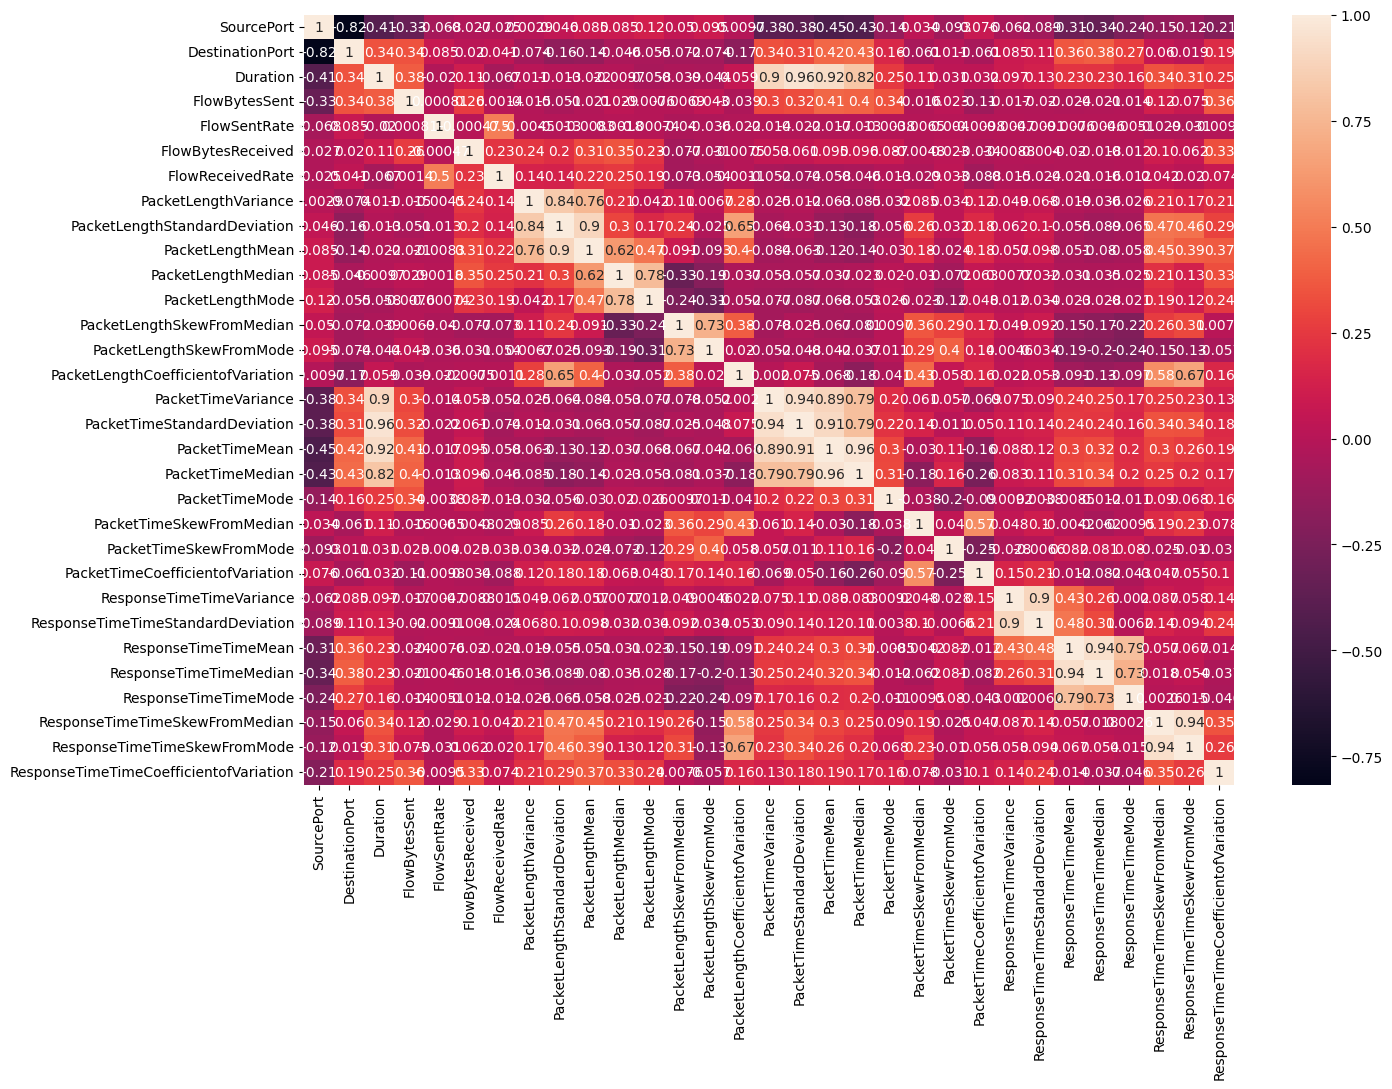

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(data=cor, annot=True)

Text(0.5, 1.0, 'Non-DoH')

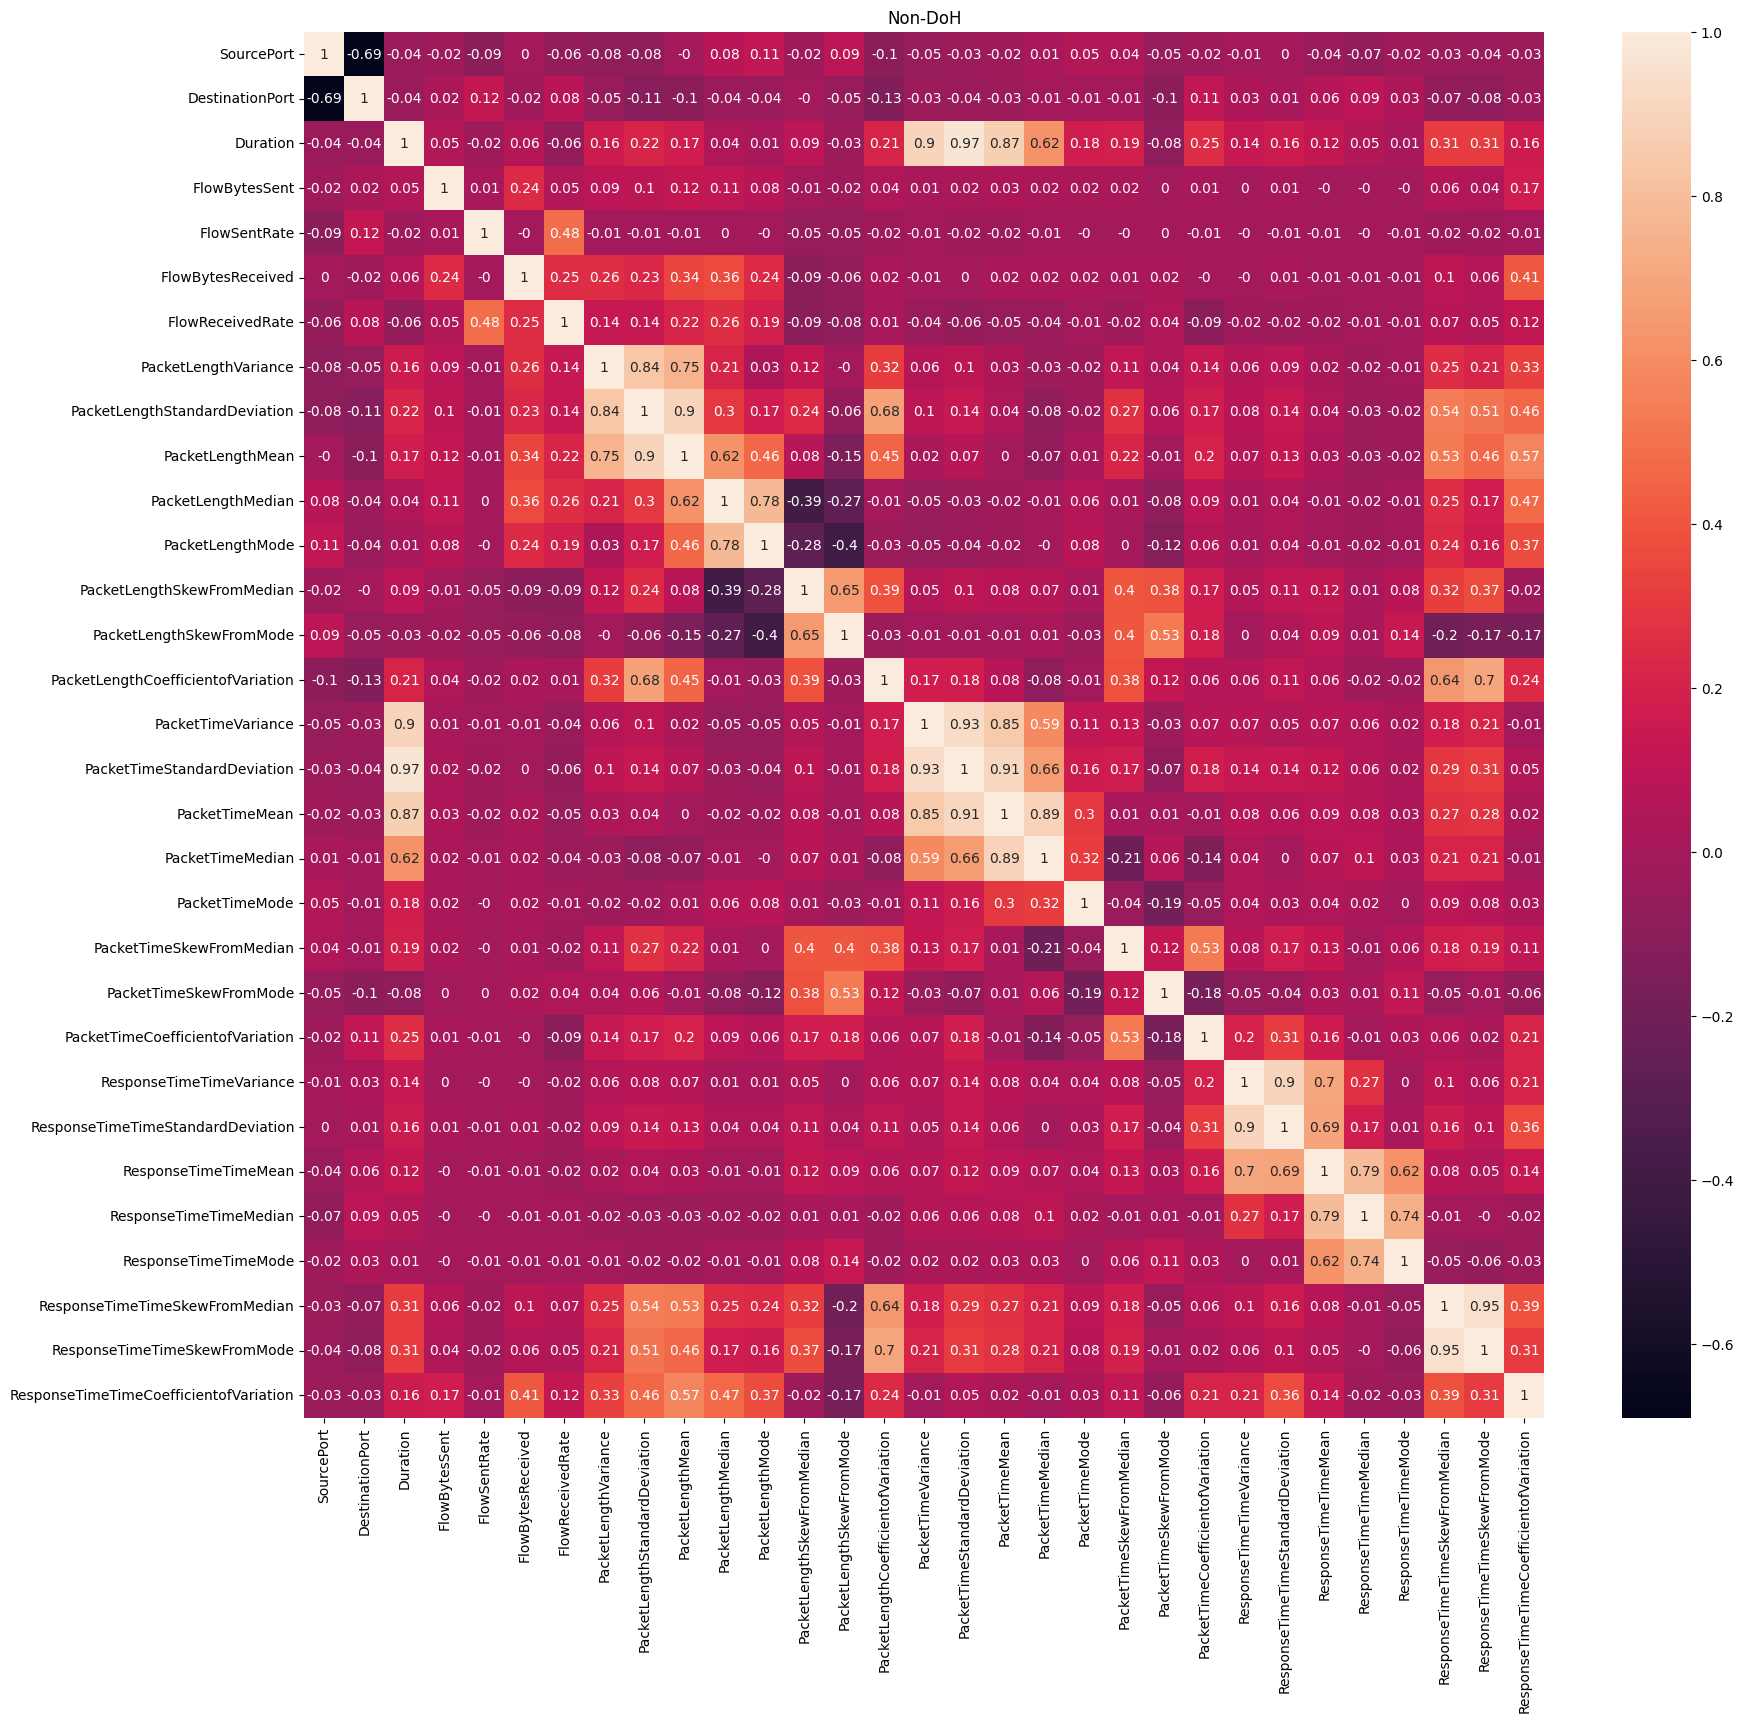

In [17]:
hep = df.loc[df.Label=="NonDoH"]

corr_mat_hep = hep.corr().round(2)
corr_mat_hep

plt.figure(figsize=(20,18))
plot = sns.heatmap(hep.corr().round(2), annot= True)
plot.set_title("Non-DoH")

Text(0.5, 1.0, 'Benign')

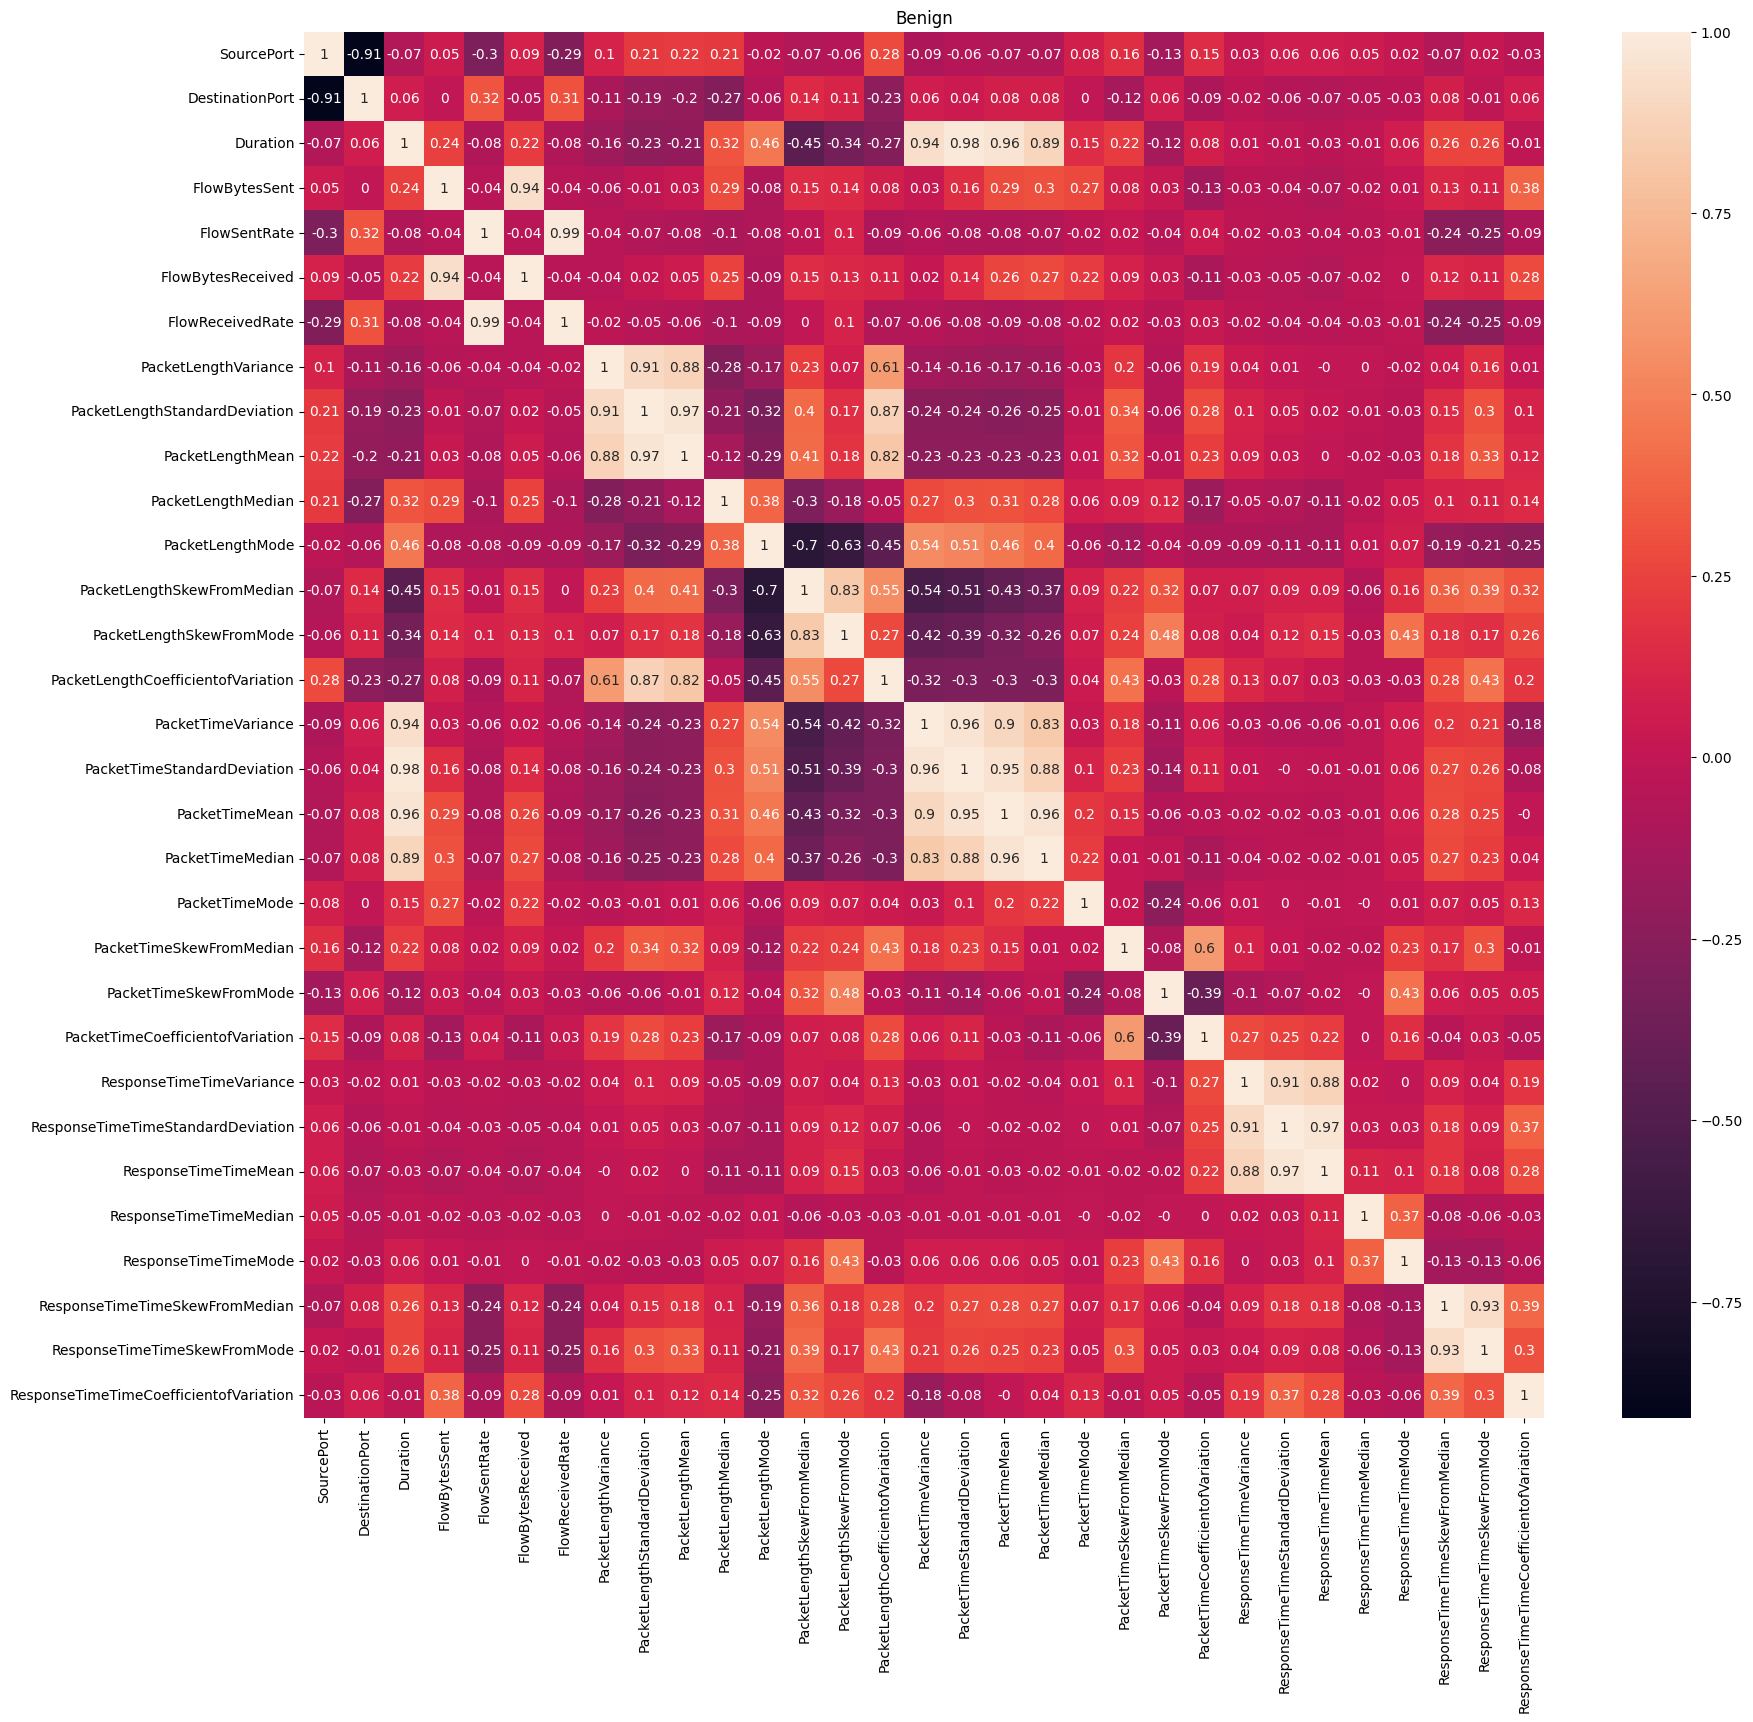

In [18]:
hep = df.loc[df.Label=="Benign"]

corr_mat_hep = hep.corr().round(2)
corr_mat_hep

plt.figure(figsize=(20,18))
plot = sns.heatmap(hep.corr().round(2), annot= True)
plot.set_title("Benign")

Text(0.5, 1.0, 'Malicious')

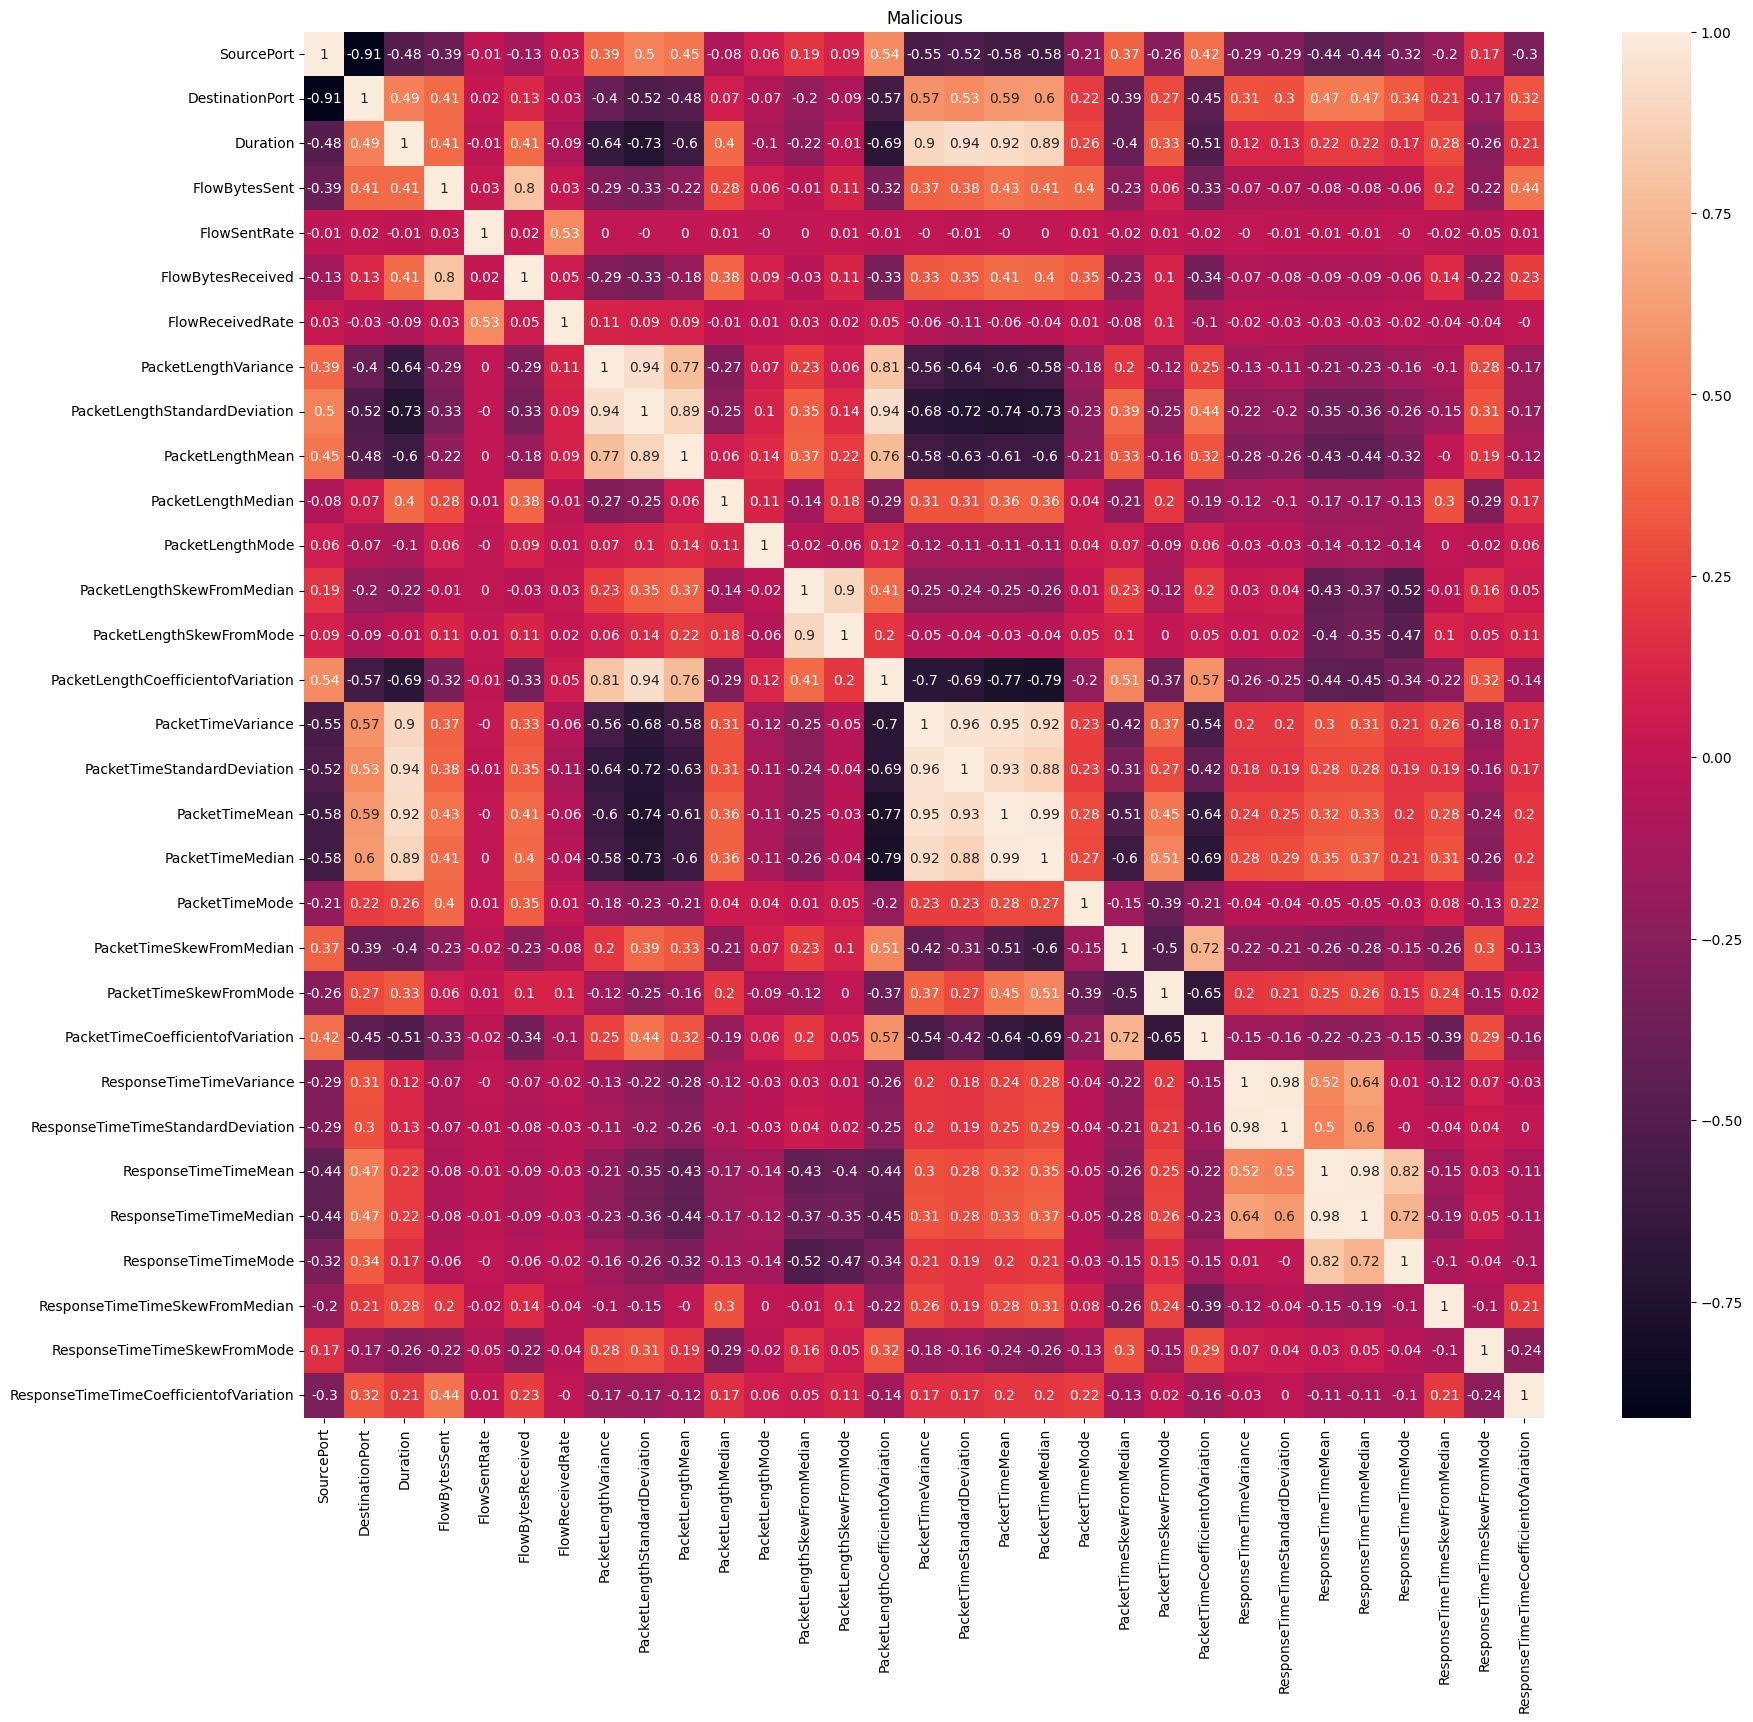

In [19]:
hep = df.loc[df.Label=="Malicious"]

corr_mat_hep = hep.corr().round(2)
corr_mat_hep

plt.figure(figsize=(20,18))
plot = sns.heatmap(hep.corr().round(2), annot= True)
plot.set_title("Malicious")

In [20]:
df['Label']

0             NonDoH
1             NonDoH
2             NonDoH
3             NonDoH
4             NonDoH
             ...    
1167131    Malicious
1167132    Malicious
1167133    Malicious
1167134    Malicious
1167135    Malicious
Name: Label, Length: 1163803, dtype: object

<AxesSubplot: xlabel='FlowBytesReceived', ylabel='Label'>

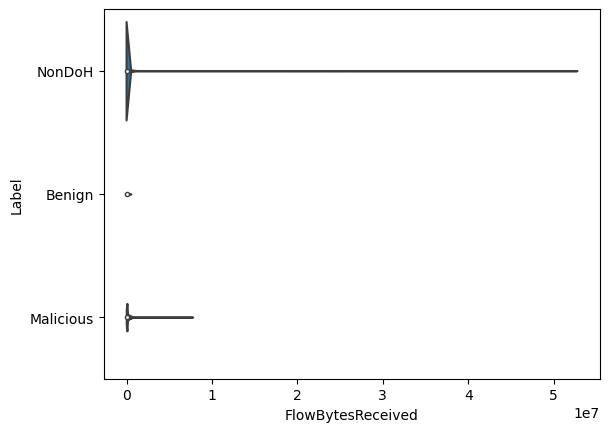

In [39]:
sns.violinplot(data=df, x="FlowBytesReceived", y="Label", scale="count")

<AxesSubplot: xlabel='PacketLengthMean', ylabel='Label'>

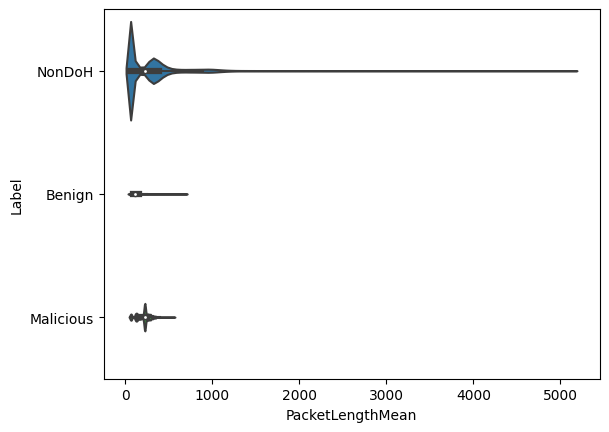

In [22]:
sns.violinplot(data=df, x="PacketLengthMean", y="Label", scale="count")

<AxesSubplot: xlabel='PacketLengthVariance', ylabel='Label'>

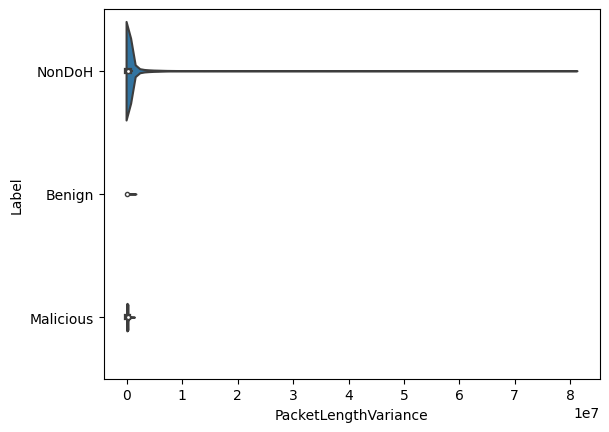

In [23]:
sns.violinplot(data=df, x="PacketLengthVariance", y="Label", scale="count")

<AxesSubplot: xlabel='PacketLengthMean', ylabel='Label'>

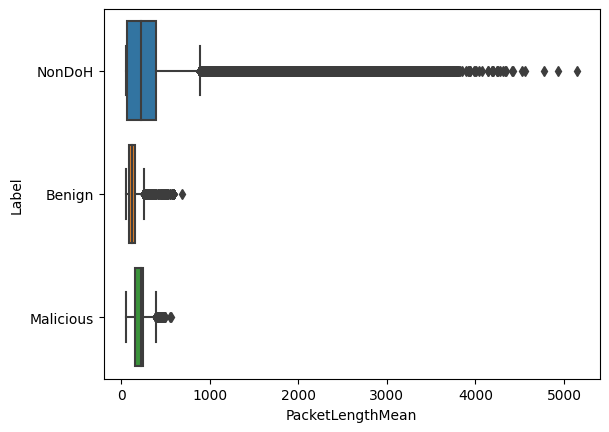

In [24]:
sns.boxplot(data=df, x="PacketLengthMean", y="Label")

<AxesSubplot: xlabel='PacketLengthVariance', ylabel='Label'>

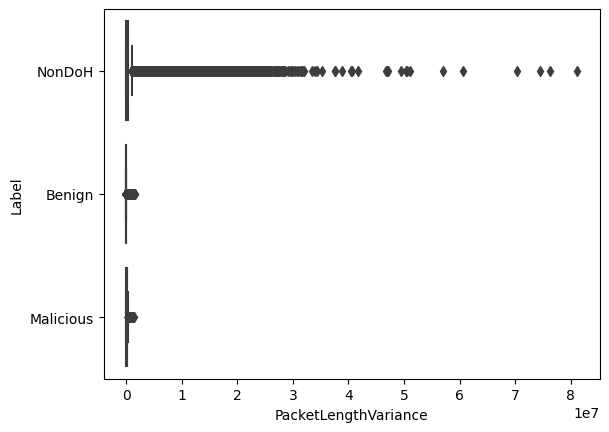

In [25]:
sns.boxplot(data=df, x="PacketLengthVariance", y="Label")

<AxesSubplot: xlabel='FlowBytesReceived', ylabel='Label'>

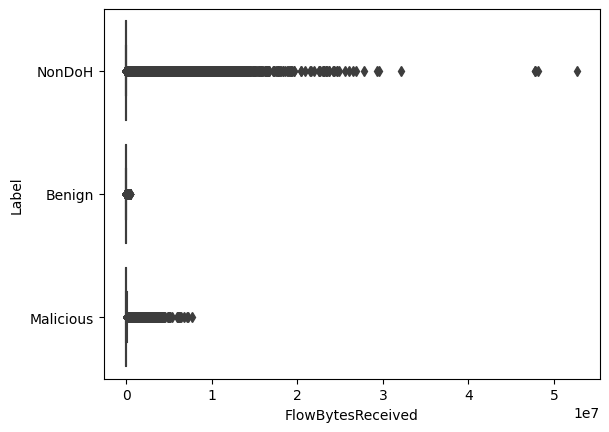

In [26]:
sns.boxplot(data=df, x="FlowBytesReceived", y="Label")

<AxesSubplot: xlabel='Duration', ylabel='Count'>

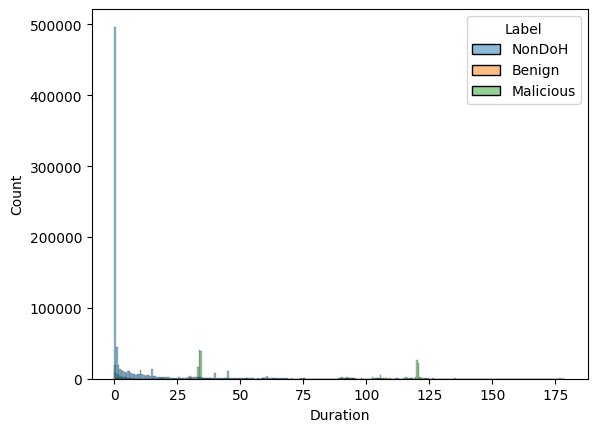

In [27]:
sns.histplot(data=df, x='Duration', hue='Label')

<AxesSubplot: xlabel='ResponseTimeTimeSkewFromMedian', ylabel='Count'>

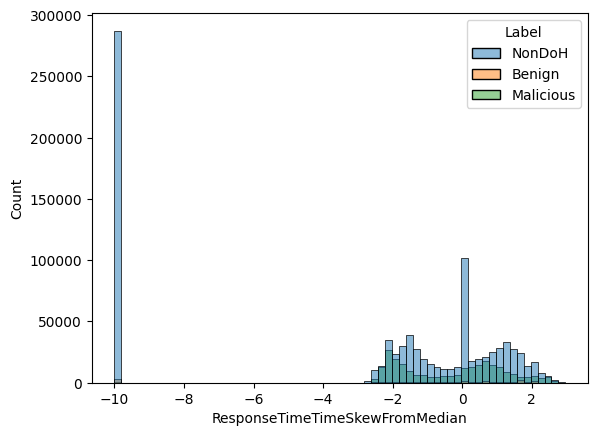

In [28]:
sns.histplot(data=df, x='ResponseTimeTimeSkewFromMedian', hue='Label')

<AxesSubplot: xlabel='ResponseTimeTimeMean', ylabel='Label'>

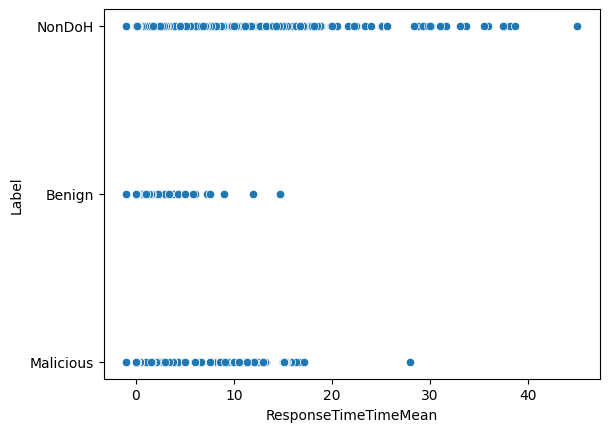

In [29]:
sns.scatterplot(data=df, x="ResponseTimeTimeMean", y="Label")

In [54]:
df.columns

Index(['SourcePort', 'DestinationPort', 'Duration', 'FlowBytesSent',
       'FlowSentRate', 'FlowBytesReceived', 'FlowReceivedRate',
       'PacketLengthVariance', 'PacketLengthStandardDeviation',
       'PacketLengthMean', 'PacketLengthMedian', 'PacketLengthMode',
       'PacketLengthSkewFromMedian', 'PacketLengthSkewFromMode',
       'PacketLengthCoefficientofVariation', 'PacketTimeVariance',
       'PacketTimeStandardDeviation', 'PacketTimeMean', 'PacketTimeMedian',
       'PacketTimeMode', 'PacketTimeSkewFromMedian', 'PacketTimeSkewFromMode',
       'PacketTimeCoefficientofVariation', 'ResponseTimeTimeVariance',
       'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean',
       'ResponseTimeTimeMedian', 'ResponseTimeTimeMode',
       'ResponseTimeTimeSkewFromMedian', 'ResponseTimeTimeSkewFromMode',
       'ResponseTimeTimeCoefficientofVariation', 'Label'],
      dtype='object')

<AxesSubplot: xlabel='Duration', ylabel='Density'>

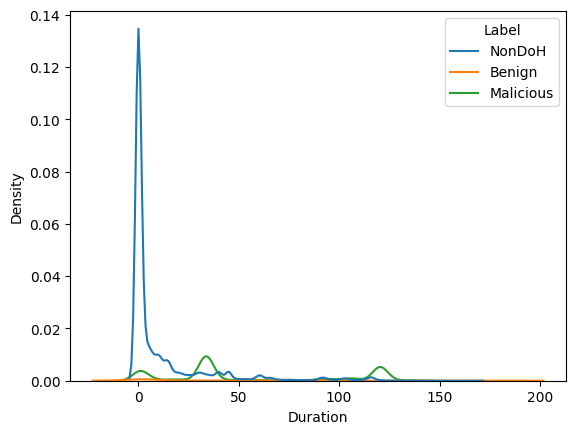

In [72]:
sns.kdeplot(data=df, x="Duration", hue="Label")

More impact to classifiy

<AxesSubplot: xlabel='FlowBytesSent', ylabel='Density'>

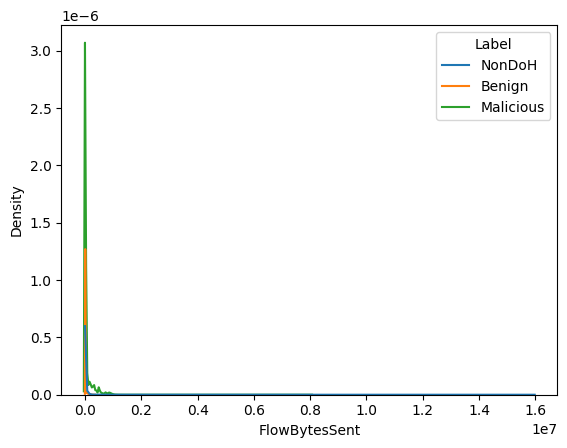

In [73]:
sns.kdeplot(data=df, x="FlowBytesSent", hue="Label")

<AxesSubplot: xlabel='FlowSentRate', ylabel='Density'>

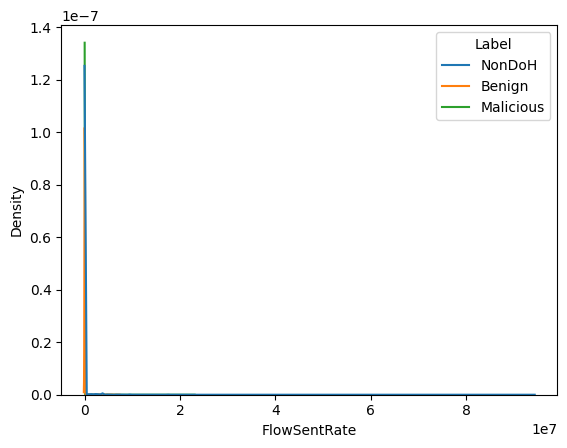

In [74]:
sns.kdeplot(data=df, x="FlowSentRate", hue="Label")

<AxesSubplot: xlabel='FlowBytesReceived', ylabel='Density'>

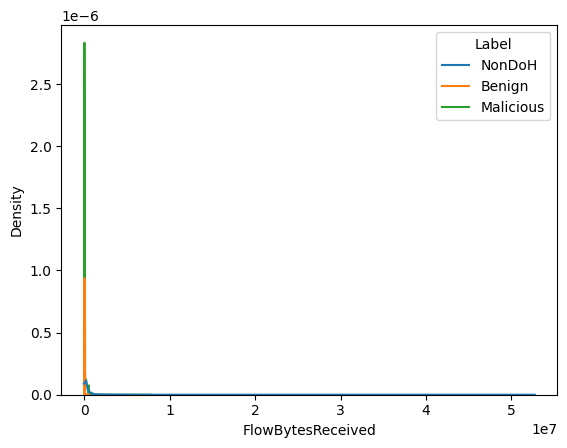

In [75]:
sns.kdeplot(data=df, x="FlowBytesReceived", hue="Label")

<AxesSubplot: xlabel='FlowReceivedRate', ylabel='Density'>

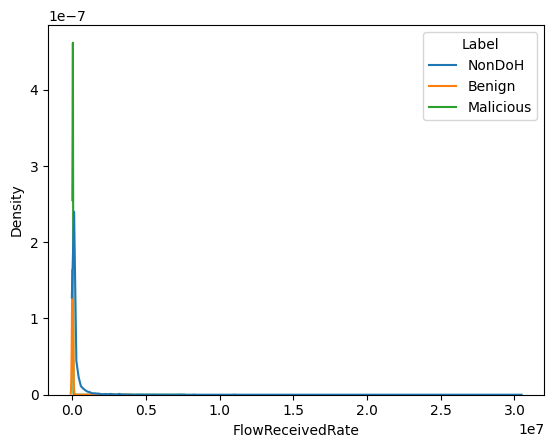

In [76]:
sns.kdeplot(data=df, x="FlowReceivedRate", hue="Label")

<AxesSubplot: xlabel='PacketLengthVariance', ylabel='Density'>

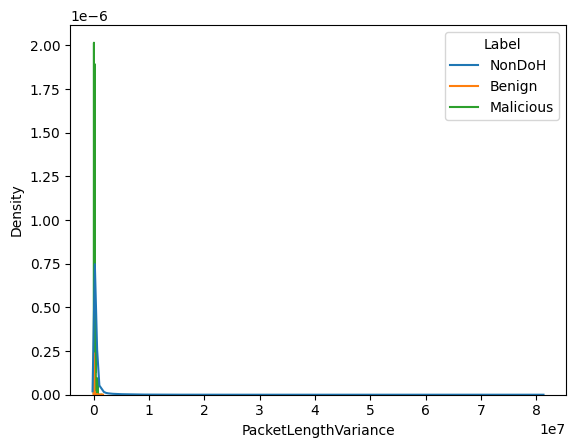

In [77]:
sns.kdeplot(data=df, x="PacketLengthVariance", hue="Label")

<AxesSubplot: xlabel='PacketLengthStandardDeviation', ylabel='Density'>

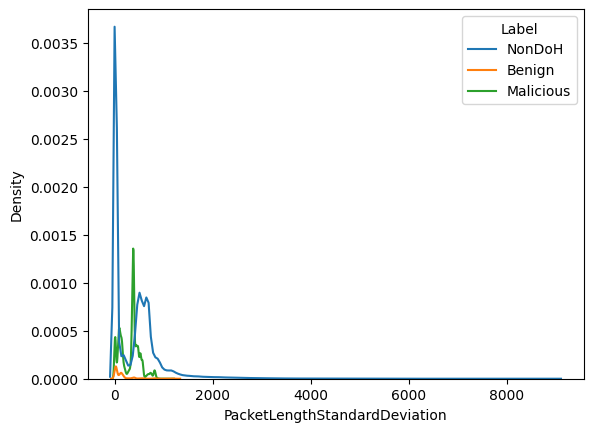

In [78]:
sns.kdeplot(data=df, x="PacketLengthStandardDeviation", hue="Label")

<AxesSubplot: xlabel='PacketLengthMean', ylabel='Density'>

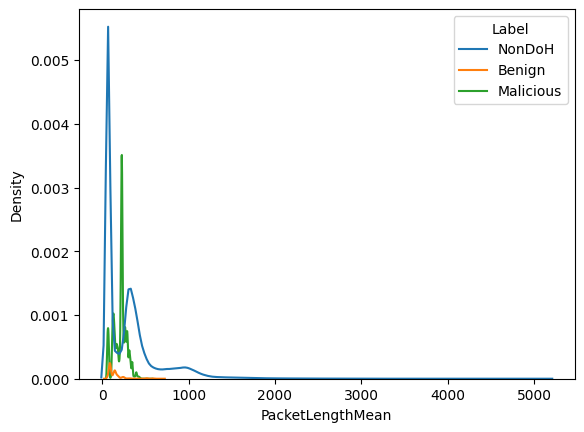

In [79]:
sns.kdeplot(data=df, x="PacketLengthMean", hue="Label")

<AxesSubplot: xlabel='PacketLengthMedian', ylabel='Density'>

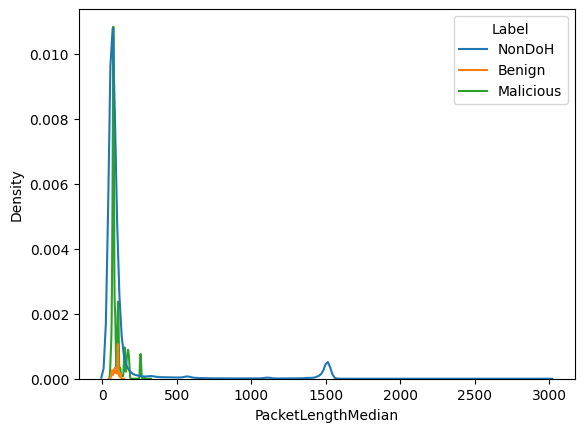

In [80]:
sns.kdeplot(data=df, x="PacketLengthMedian", hue="Label")

<AxesSubplot: xlabel='PacketLengthMode', ylabel='Density'>

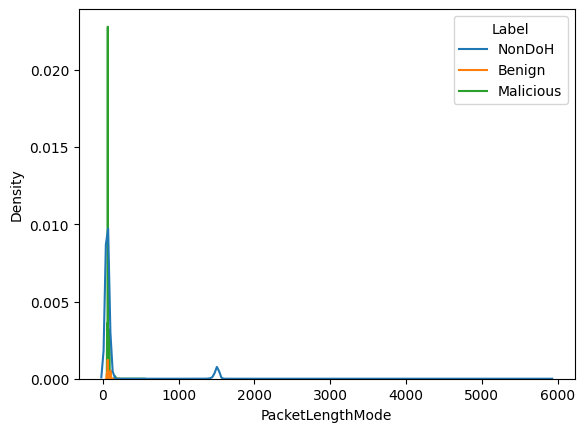

In [81]:
sns.kdeplot(data=df, x="PacketLengthMode", hue="Label")

<AxesSubplot: xlabel='PacketLengthSkewFromMedian', ylabel='Density'>

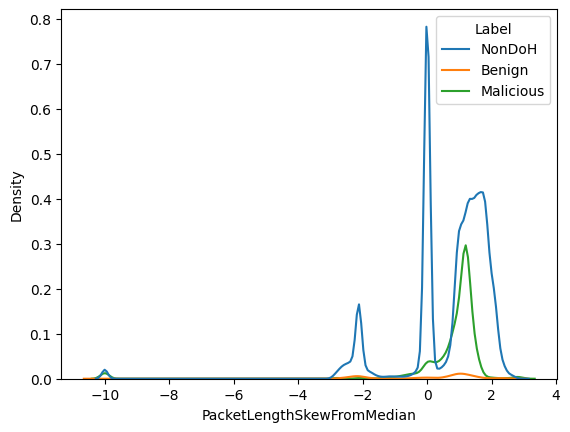

In [82]:
sns.kdeplot(data=df, x="PacketLengthSkewFromMedian", hue="Label")

<AxesSubplot: xlabel='PacketLengthSkewFromMode', ylabel='Density'>

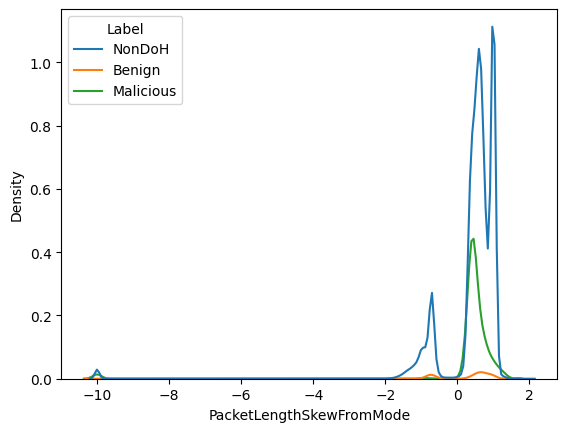

In [83]:
sns.kdeplot(data=df, x="PacketLengthSkewFromMode", hue="Label")

<AxesSubplot: xlabel='PacketLengthCoefficientofVariation', ylabel='Density'>

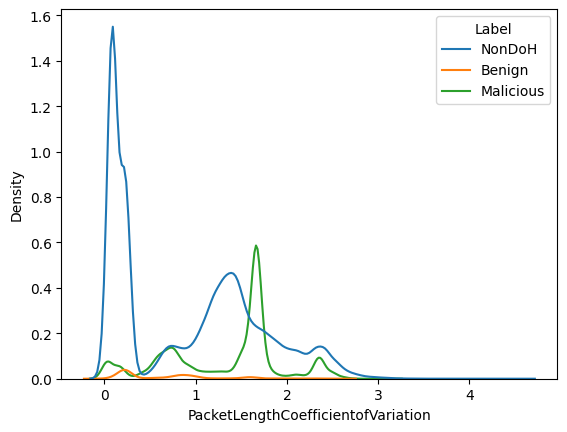

In [71]:
sns.kdeplot(data=df, x="PacketLengthCoefficientofVariation", hue="Label")

<AxesSubplot: xlabel='PacketTimeVariance', ylabel='Density'>

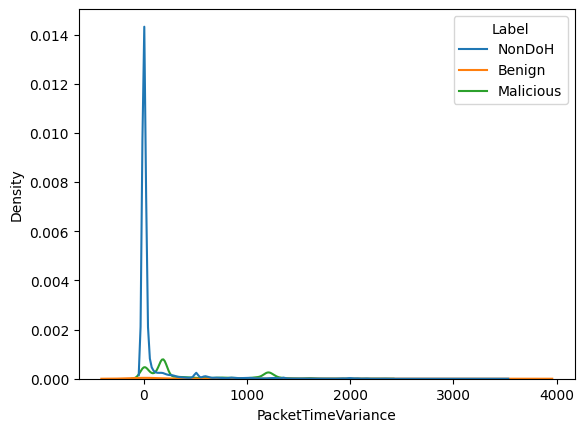

In [70]:
sns.kdeplot(data=df, x="PacketTimeVariance", hue="Label")

<AxesSubplot: xlabel='PacketTimeStandardDeviation', ylabel='Density'>

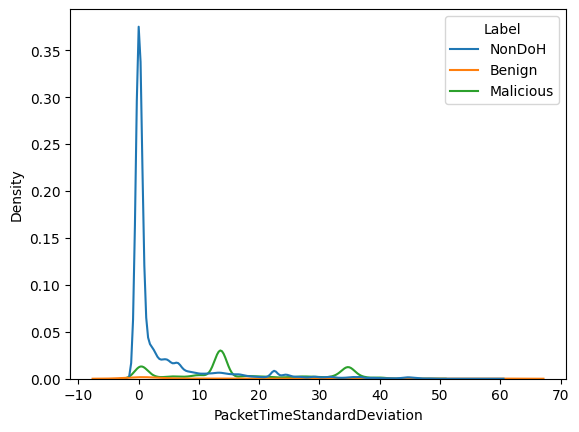

In [69]:
sns.kdeplot(data=df, x="PacketTimeStandardDeviation", hue="Label")

<AxesSubplot: xlabel='PacketTimeMean', ylabel='Density'>

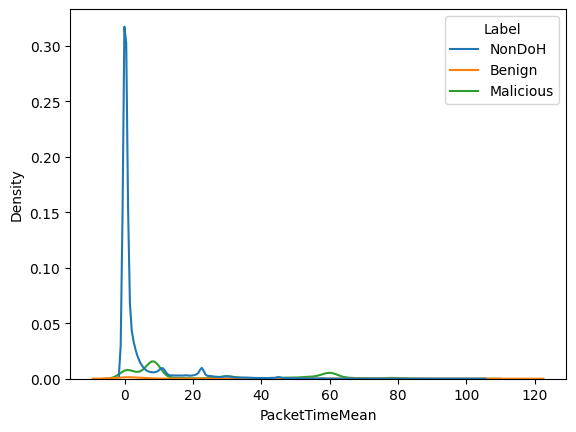

In [68]:
sns.kdeplot(data=df, x="PacketTimeMean", hue="Label")

<AxesSubplot: xlabel='PacketTimeMedian', ylabel='Density'>

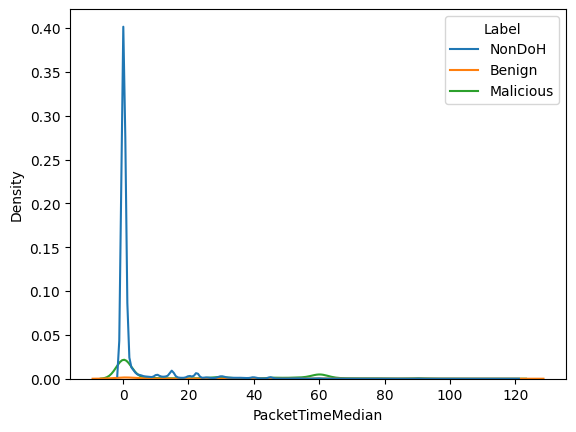

In [67]:
sns.kdeplot(data=df, x="PacketTimeMedian", hue="Label")

<AxesSubplot: xlabel='PacketTimeMode', ylabel='Density'>

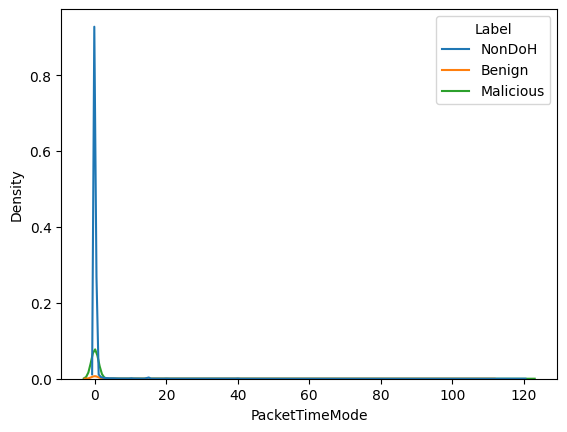

In [66]:
sns.kdeplot(data=df, x="PacketTimeMode", hue="Label")

<AxesSubplot: xlabel='PacketTimeSkewFromMedian', ylabel='Density'>

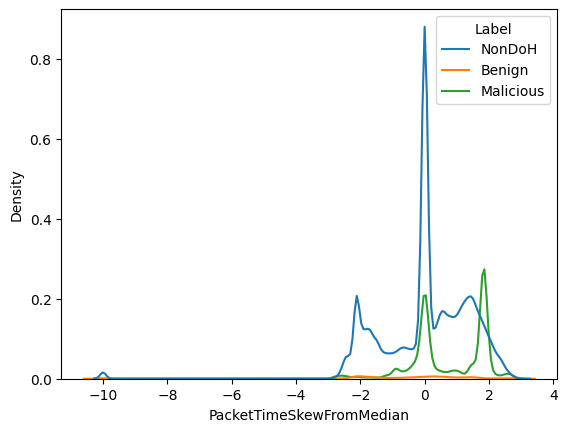

In [65]:
sns.kdeplot(data=df, x="PacketTimeSkewFromMedian", hue="Label")

<AxesSubplot: xlabel='PacketTimeSkewFromMode', ylabel='Density'>

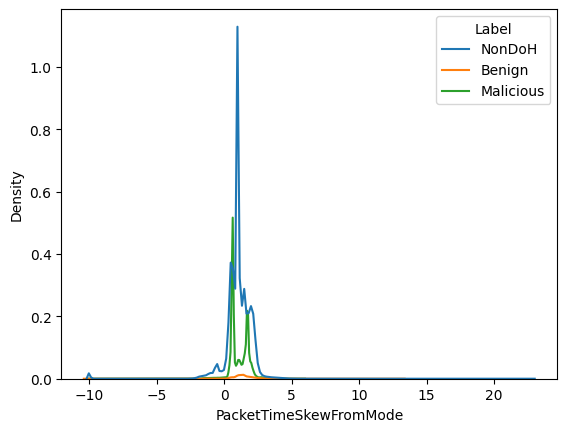

In [64]:
sns.kdeplot(data=df, x="PacketTimeSkewFromMode", hue="Label")

<AxesSubplot: xlabel='PacketTimeCoefficientofVariation', ylabel='Density'>

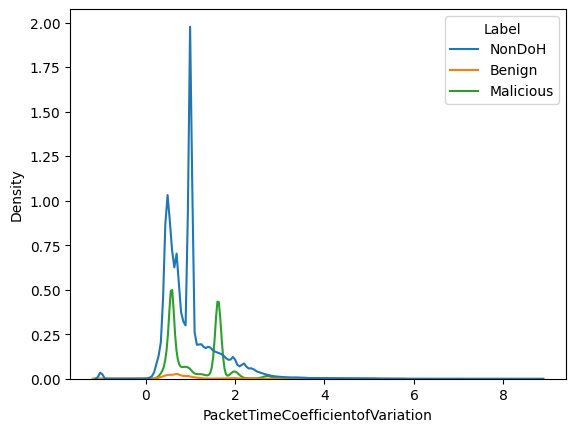

In [63]:
sns.kdeplot(data=df, x="PacketTimeCoefficientofVariation", hue="Label")

<AxesSubplot: xlabel='ResponseTimeTimeVariance', ylabel='Density'>

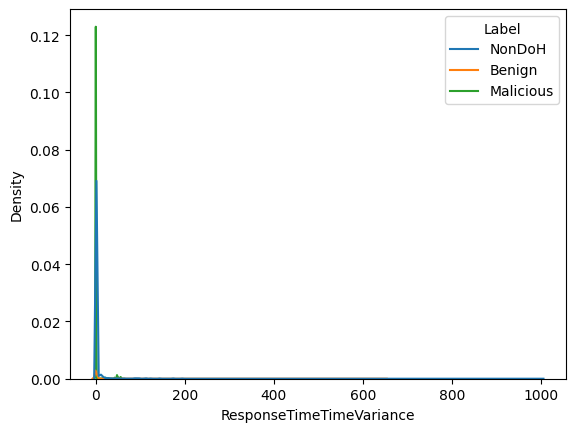

In [62]:
sns.kdeplot(data=df, x="ResponseTimeTimeVariance", hue="Label")

<AxesSubplot: xlabel='ResponseTimeTimeStandardDeviation', ylabel='Density'>

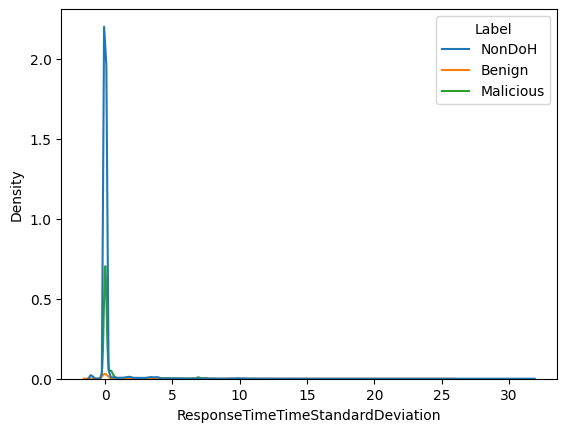

In [61]:
sns.kdeplot(data=df, x="ResponseTimeTimeStandardDeviation", hue="Label")

<AxesSubplot: xlabel='ResponseTimeTimeMean', ylabel='Density'>

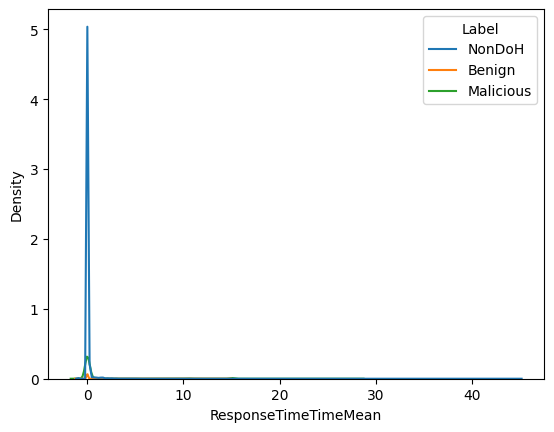

In [60]:
sns.kdeplot(data=df, x="ResponseTimeTimeMean", hue="Label")

<AxesSubplot: xlabel='ResponseTimeTimeMedian', ylabel='Density'>

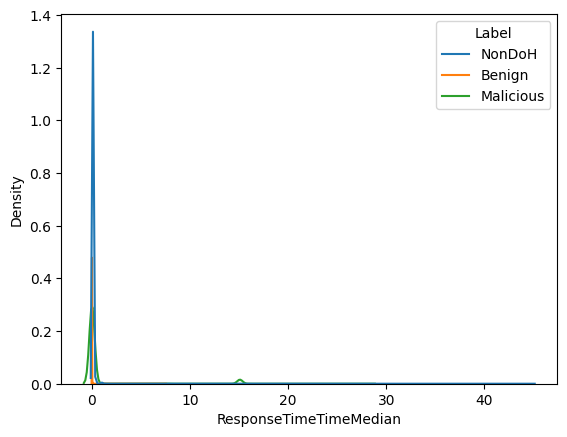

In [59]:
sns.kdeplot(data=df, x="ResponseTimeTimeMedian", hue="Label")

<AxesSubplot: xlabel='ResponseTimeTimeMode', ylabel='Density'>

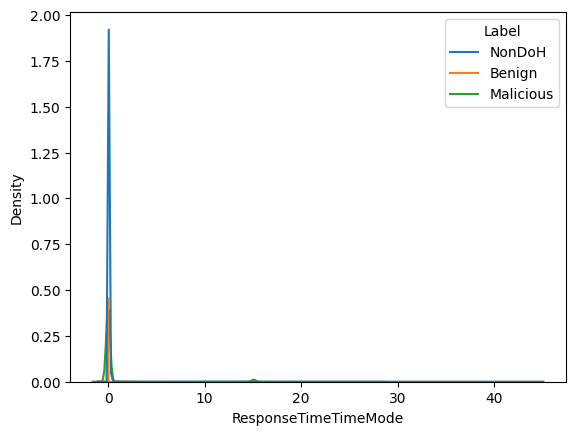

In [58]:
sns.kdeplot(data=df, x="ResponseTimeTimeMode", hue="Label")

<AxesSubplot: xlabel='ResponseTimeTimeSkewFromMedian', ylabel='Density'>

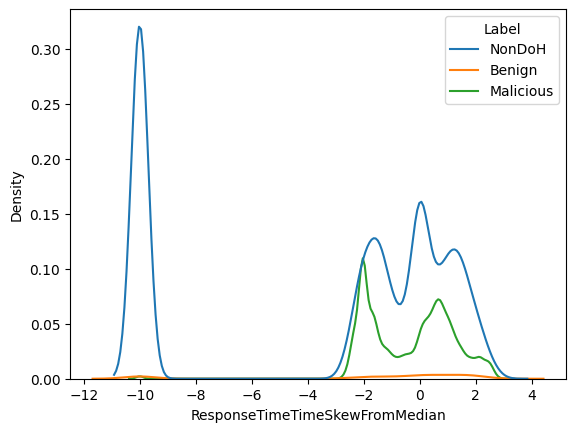

In [57]:
sns.kdeplot(data=df, x="ResponseTimeTimeSkewFromMedian", hue="Label")

<AxesSubplot: xlabel='ResponseTimeTimeSkewFromMode', ylabel='Density'>

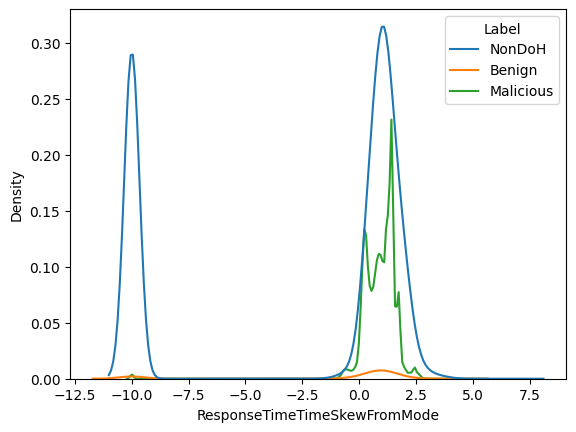

In [56]:
sns.kdeplot(data=df, x="ResponseTimeTimeSkewFromMode", hue="Label")

<AxesSubplot: xlabel='ResponseTimeTimeCoefficientofVariation', ylabel='Density'>

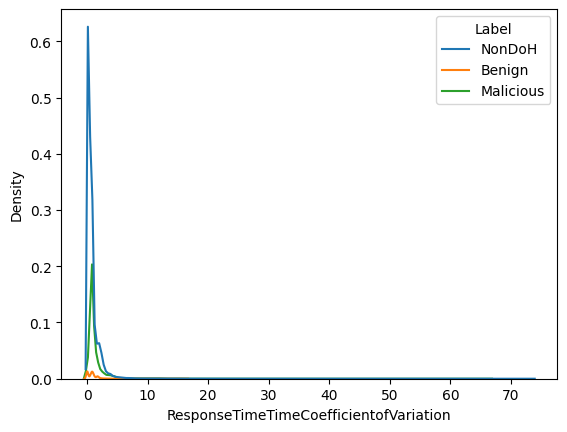

In [55]:
sns.kdeplot(data=df, x="ResponseTimeTimeCoefficientofVariation", hue="Label")

In [31]:
# split dataset in features and target variable

# Features
X = df.drop(columns=["Label"])

# Target variable
y = df['Label'] 


In [32]:
# import sklearn packages for data treatments
from sklearn.model_selection import train_test_split # Import train_test_split function

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [33]:
X_train.shape

(814662, 31)

In [34]:
y_train.shape

(814662,)

In [35]:
X_test.shape

(349141, 31)

In [36]:
y_test.shape

(349141,)

In [37]:
models = []
models.append(('ETC', ExtraTreesClassifier()))
models.append(('RFC', RandomForestClassifier()))

print(models)

[('ETC', ExtraTreesClassifier()), ('RFC', RandomForestClassifier())]


In [7]:
from imblearn.over_sampling import SMOTE
def upsample_SMOTE(X_train, y_train, ratio=1.0):
    sm = SMOTE(random_state=23, sampling_strategy=ratio)
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    print(len(X_train_sm), len(y_train_sm))
    return X_train_sm, y_train_sm